In [1]:
import astropy
import matplotlib
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS

import matplotlib.pyplot as plt

In [10]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (9, 6)

In [2]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/LMC_30Dor_fg/the actual cube!.fits')
file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 3191                                                  
NAXIS2  =                 2681                                                  
NAXIS3  =                  301                                                  
BLANK   =                   -1  /                                               
BUNIT   = 'K       '                                                            
DATE-OBS= '2021-10-27T16:16:57.5'  /                                            
TELESCOP= 'ASKAP   '  /                                                         
CRPIX1  =    1.70200000000E+03  /                                               
CDELT1  =   -1.94444444444E-03  /                                               
CRVAL1  =    8.32511958333E+

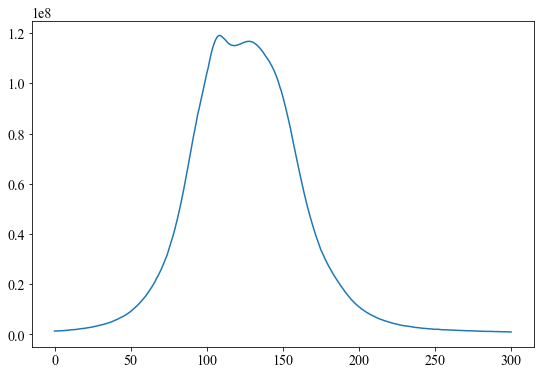

In [30]:
# plot of velocity vs brightness intensity
sum_data = np.sum(np.sum(file[0].data, axis = 1), axis = 1)
plt.plot(sum_data) 

In [1]:
# gets index of a specific velocity

def v_indx(v_val): # v_val must be in m/s
    v_indx = int((v_val - (3.04208717990 * 10 ** 4)) / (-2.44297870185 * 10 ** 2))
    return v_indx

In [8]:
# gets channel maps

def chan_map(v_indx, v, vmin = 3, vmax = 30):
    wcs = WCS(file[0].header) # assigning world coordinate system (for the grid lines) 
    ax = plt.subplot(projection = wcs, slices=('x', 'y', v_indx))
    im = ax.imshow(file[0].data[v_indx,:,:], cmap = 'magma', vmin = vmin, vmax = vmax)
    plt.colorbar(im)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontsize = 20)
    plt.ylabel('Declination', fontsize = 20)
    ax.set_title('Velocity = ' + str(v) + ' km/s', fontsize = 22)

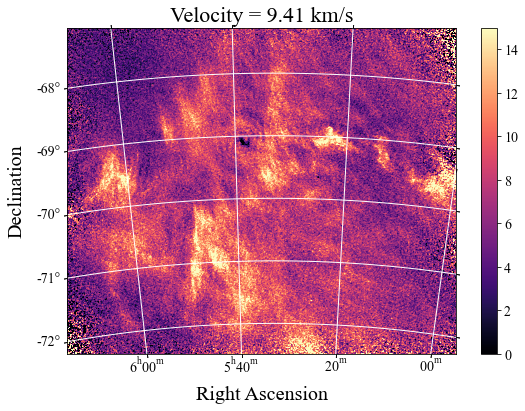

In [11]:
# structure beginning to enter in @ 9.41 km/s

chan_map(v_indx(9.41 * 10 **3), 9.41, 0, 15)

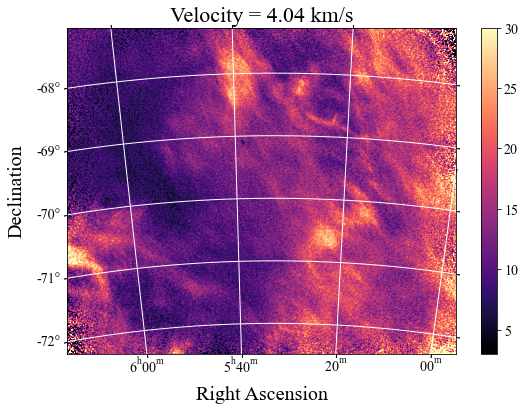

In [24]:
chan_map(v_indx(4.04 * 10 ** 3), 4.04)

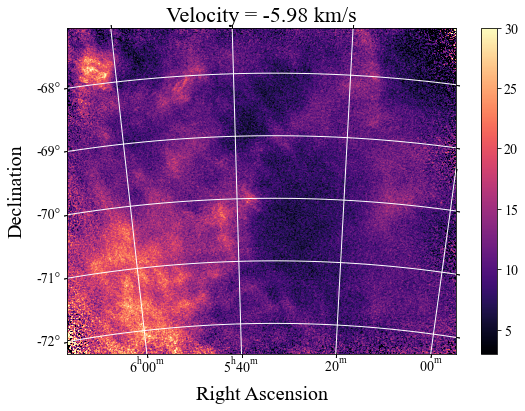

In [25]:
chan_map(v_indx(-5.98 * 10 ** 3), -5.98)

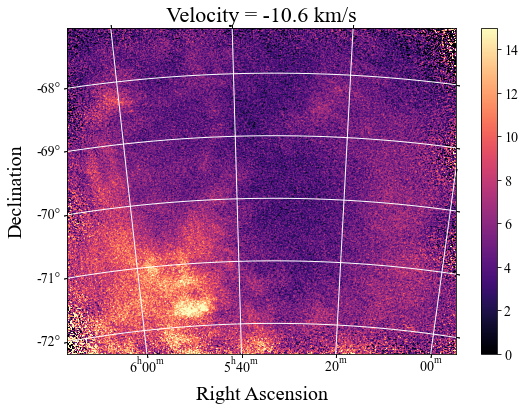

In [26]:
chan_map(v_indx(-1.06 * 10 ** 4), -10.6, 0, 15)